## Rule of Thumb

1. Effect size serves as a supplement information in addition to statistical test. In practise, it is good to report the sample size, statistical significance, correlation coefficient, and effect size.
2. In population (with assumption of large size), the high correlation coefficient is often statistical significant.
3. The larger the sample size, the more stable and reliable the computed correlation coeeficents (i.e. closer to the correlation coeeficient of population).
4. No matter how much of iteration we use, we couldn't get stable and reliable correlation coefficients from small samples.
5. With larger sample size, the large correlation coeficient that is considered to be statistical significant is more reliable. It could imply the genuine relationship between two variables.

In [1]:
import pandas as pd
import numpy as np

from numpy.random import seed
from numpy.random import randn

from scipy.stats import pearsonr, spearmanr

import matplotlib
import matplotlib.pyplot as plt

font = {'size': 18}

matplotlib.rc('font', **font)

# Population

## Practical Importance (Effect size)

The coefficient of determination is used to evaluate the practical importance. It quantifies how much of variation in a variable is associated with variation in another variable. In other words, how does a variable affect another variable?

Typically, the larger the effect size, the stronger the relationship between two variables.

# Statistical test (p-value) and effect size

- A low p-value can only tell us that there is relationship between two variables.
- Effect size depicts how strong is the relationship between two variables.

## Study 1: the relationship between correlation coefficient and p-value (in population)

We often see the word "statistical significant" when coming to statistical test. In correlation test, it is in fact about the likelihood that the computed correlation coefficient value is merely caused by chance or if it reflects the genuine relationship in the population.

In order to evaluate the relationship between correlation coefficient and p-value, same experiment setting is applied to three different datasets.

- dataset1: 10% of y is depended on the value of x in different levels. 90% of y is randomly generated.
- dataset2: 100% of y is depended on the value of x, but in different levels.
- dataset3: 100% of y is depended on the value of x with a constant magnitude.

In [2]:
def plot_and_corr(dataset, method='pearson'):
    
    plt.figure(figsize=(13, 8))

    plt.scatter(x=dataset['x'], y=dataset['y'])

    plt.show()
    
    if method == 'pearson':
        popu_coef, popu_p = pearsonr(x=dataset['x'], y=dataset['y'])
        
    elif method == 'spearman':
        popu_coef, popu_p = spearmanr(a=dataset['x'], b=dataset['y'])
    
    print(popu_coef)
    print(popu_p)

    # interpret
    alpha = 0.05
    if popu_p > alpha:
        print('There is no relationship between two variables. (fail to reject H0)')
    else:
        print('The is relationship between two variables. (reject H0)')
        
    coef_deter = round(popu_coef**2*100, 2) 
    
    print(f'The coefficient of determination is {coef_deter}%. In other words, knowledge of one of the variables would account for {coef_deter}% of the variance in another variable.')
        
    return popu_coef, popu_p, coef_deter

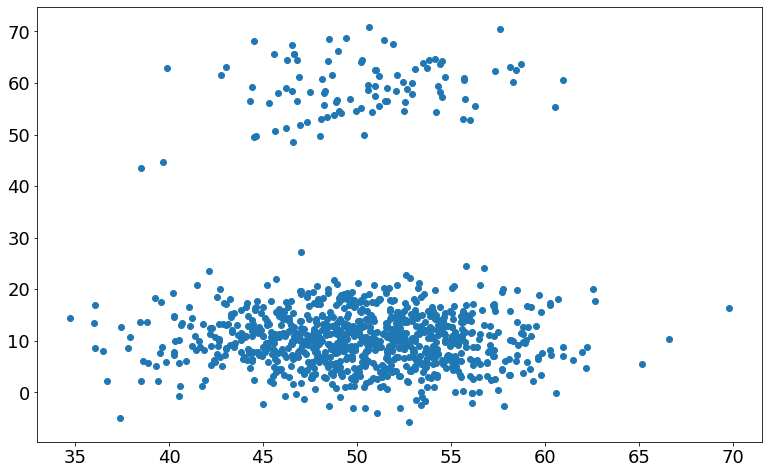

-0.026152982152982153
0.40872647476013024
There is no relationship between two variables. (fail to reject H0)
The coefficient of determination is 0.07%. In other words, knowledge of one of the variables would account for 0.07% of the variance in another variable.


In [3]:
# seed the random number generator
seed(1)

# dataset 1
data1 = 5 * randn(1000) + 50
data_t1 = data1[:20]+5
data_t2 = data1[:80]+10
data_t3 = 5 * randn(900) + 10
data2 = np.concatenate((data_t1, data_t2, data_t3))

dataset1 = pd.DataFrame({'x':data1, 'y':data2})

dataset1_coef, dataset1_p, dataset1_deter = plot_and_corr(dataset1, method='spearman')


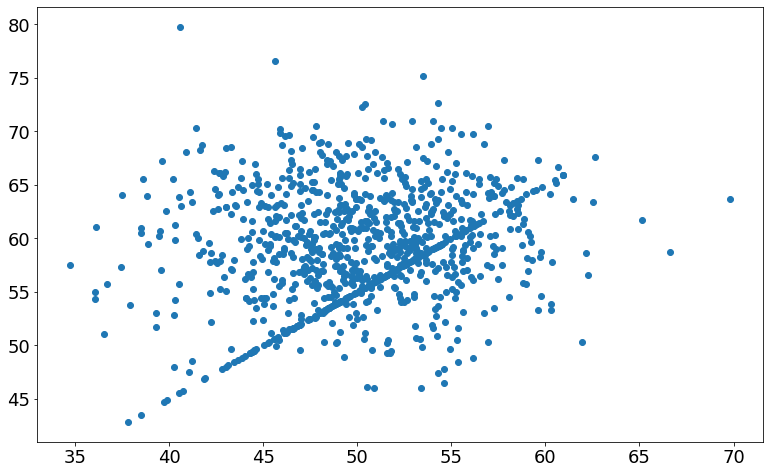

0.15694970494970498
6.103243008963485e-07
The is relationship between two variables. (reject H0)
The coefficient of determination is 2.46%. In other words, knowledge of one of the variables would account for 2.46% of the variance in another variable.


In [4]:
# seed the random number generator
seed(1)

# dataset 1
data1 = 5 * randn(1000) + 50
data_t1 = data1[:200]+5
data_t2 = data1[:800]+10
data2 = np.concatenate((data_t1, data_t2))

dataset2 = pd.DataFrame({'x':data1, 'y':data2})

dataset2_coef, dataset2_p, dataset2_deter = plot_and_corr(dataset2, method='spearman')

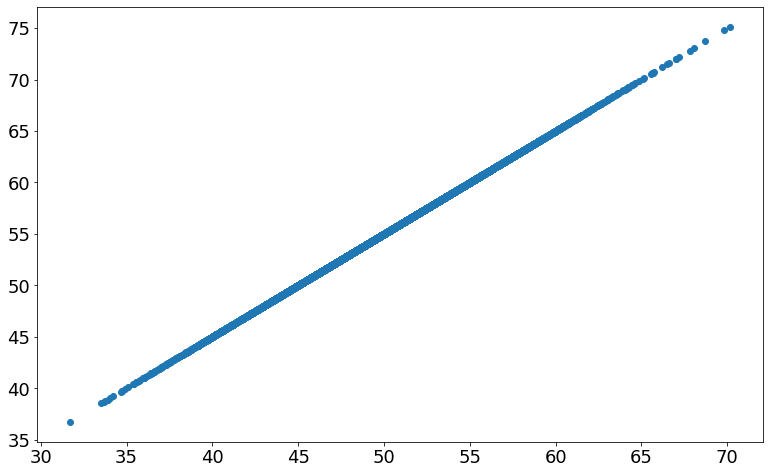

1.0
0.0
The is relationship between two variables. (reject H0)
The coefficient of determination is 100.0%. In other words, knowledge of one of the variables would account for 100.0% of the variance in another variable.


In [5]:
# seed the random number generator
seed(1)

data1 = 5 * randn(10000) + 50
data2 = data1+5

dataset3 = pd.DataFrame({'x':data1, 'y':data2})

dataset3_coef, dataset3_p, dataset3_deter = plot_and_corr(dataset3, method='spearman')

In [6]:
datasets = ['dataset1', 'dataset2', 'dataset3']
coefs = [dataset1_coef, dataset2_coef, dataset3_coef]
p_values = [dataset1_p, dataset2_p, dataset3_p]
deters = [dataset1_deter, dataset2_deter, dataset3_deter]

df_result = pd.DataFrame(list(zip(datasets, coefs, p_values, deters)), 
                         columns =['dataset', 'coef', 'p_value', 'effect_size'])

df_result

,dataset,coef,p_value,effect_size
0,dataset1,-0.026153,4.087265e-01,0.07
1,dataset2,0.156950,6.103243e-07,2.46
2,dataset3,1.000000,0.000000e+00,100.00


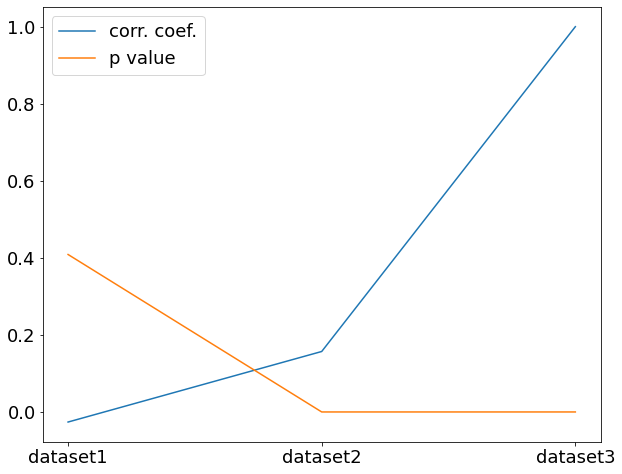

In [7]:
plt.figure(figsize=(10, 8))

plt.plot(df_result['dataset'], df_result['coef'], label='corr. coef.')
plt.plot(df_result['dataset'], df_result['p_value'], label='p value')

plt.legend()

plt.show()

### Observation

The higher the correlation coefficient, the lower the p-value.

### Conclusion

If we have large sample size (in this case, sample size=1000), the large correlation coefficient is often statistical significant. In other words, when we have large sample size, the large correlation coefficient happens because it represents a genuine relationship between the two variables.

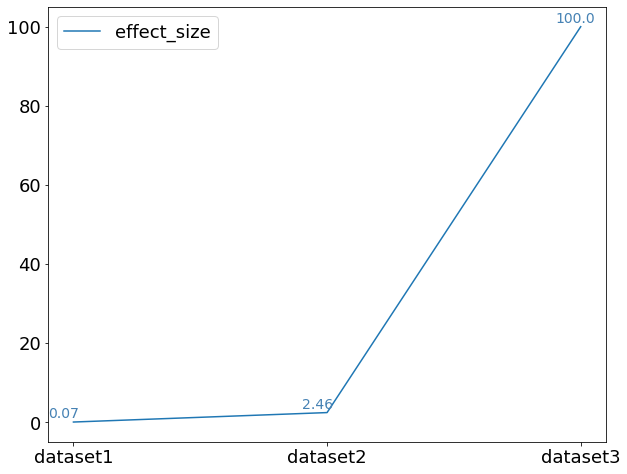

In [8]:
plt.figure(figsize=(10, 8))

plt.plot(df_result['dataset'], df_result['effect_size'], label='effect_size')

for i, v in enumerate(df_result['effect_size']):
    plt.text(i-0.1, v+1, str(v), color='steelblue', fontsize=14)

plt.legend()

plt.show()

### Conclusion

In statistical test, there is no relationship between two variables in dataset1 whereas there is relationship between two variables in dataset2 and dataset3. 

Effect size further supplements this information by providing how strong is the relationship between the two variables. As indicated in the graph, the two variables in dataset3 has stronger relationship than dataset2.

---

The example above are asummed to be carried in population (i.e. we have the data for whole population). However, this population data is usually inaccessible. Hence, it is common to use statistics obtained from sample to infer the parameters of population. 

However, there are many factors that may impact the results obtained from sample. The objective here is to come out with several rules that can help us to get more precised statistics so that we could have a more reliable inference of population praremters.

# Sample

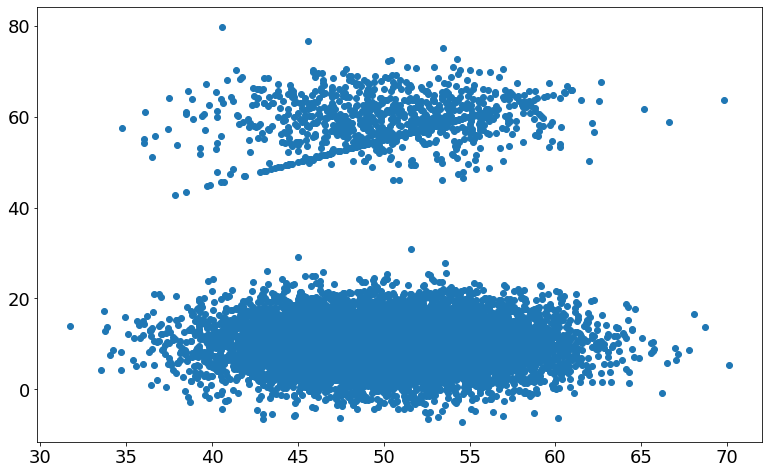

0.0014929060829290608
0.8813389855401831
There is no relationship between two variables. (fail to reject H0)
The coefficient of determination is 0.0%. In other words, knowledge of one of the variables would account for 0.0% of the variance in another variable.


In [9]:
# creata a dataset to represent a population
seed(1)

data1 = 5 * randn(10000) + 50
data_t1 = data1[:200]+5
data_t2 = data1[:800]+10
data_t3 = 5 * randn(9000) + 10
data2 = np.concatenate((data_t1, data_t2, data_t3))

df_data = pd.DataFrame({'x':data1, 'y':data2})

popu_coef, popu_p, popu_deter = plot_and_corr(df_data, method='spearman')

### Observation

In this synthetic population, there is no relationship between the variables.

## Study 2: The effect of different sample sizes to correlation coefficients.

In [10]:
sample_sizes = [10, 50, 100, 200, 500, 1000, 5000]

iterations = 10

coefs = []
max_coefs = []
min_coefs = []

for sample_size in sample_sizes:
    
    for _ in range(iterations):

        sample = df_data.sample(n=sample_size, replace=False)

        coef, p_value = spearmanr(a=sample['x'], b=sample['y'])

        coefs.append(coef)
        
    max_coef = max(coefs)
    min_coef = min(coefs)
        
    max_coefs.append(max_coef)
    min_coefs.append(min_coef)
    
    coefs = []
    
df_diff_sample_size = pd.DataFrame(list(zip(sample_sizes, min_coefs, max_coefs)), 
                  columns =['sample_size', 'min_coef', 'max_coef']) 

In [11]:
df_diff_sample_size

,sample_size,min_coef,max_coef
0,10,-0.551515,0.490909
1,50,-0.366915,0.344250
2,100,-0.081212,0.218614
3,200,-0.128963,0.132516
4,500,-0.072974,0.022879
5,1000,-0.037873,0.048033
6,5000,-0.020629,0.014362


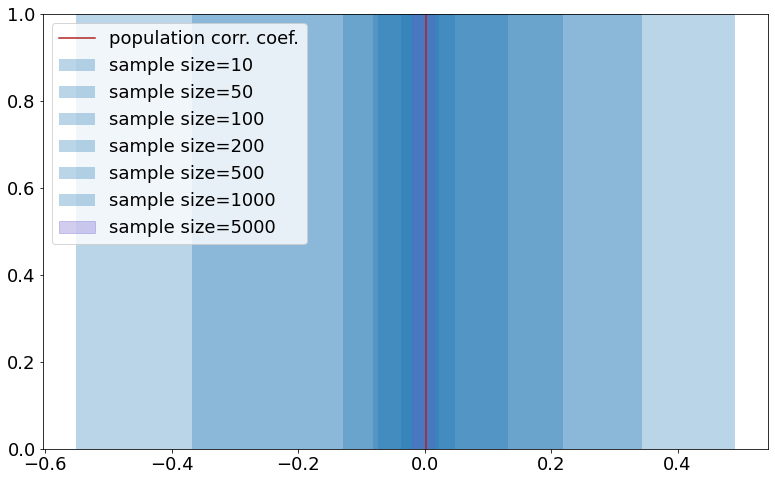

In [12]:
plt.figure(figsize=(13, 8))

plt.axvline(x=popu_coef, color='firebrick', label='population corr. coef.')

for sample_size in sample_sizes[:-1]:
    
    interested_data = df_diff_sample_size[df_diff_sample_size['sample_size']==sample_size]

    plt.axvspan(xmin=interested_data['min_coef'].values[0], xmax=interested_data['max_coef'].values[0], 
                label=f'sample size={sample_size}', alpha=0.3)

interested_data = df_diff_sample_size[df_diff_sample_size['sample_size']==5000]
    
plt.axvspan(xmin=interested_data['min_coef'].values[0], xmax=interested_data['max_coef'].values[0], 
            label=f'sample size={5000}', alpha=0.3, color='slateblue')

plt.legend()
plt.show()

### Observation

As the sample size increase, the computed correlation coefficients are closer to population correlation coefficient. 

### Conclusion

The more samples are used, the computed correlation coefficients are closer to population correlation coefficient. 

In other words, the larger the sample size, the more stable and reliable the computed correlation coeeficents.

## Study 3: The effect of different iterations to correlation coefficients.

In [13]:
sample_size = 10

iterations = [10, 100, 500, 1000, 5000]

coefs = []
max_coefs = []
min_coefs = []

for iteration in iterations:
    
    for _ in range(iteration):

        sample = df_data.sample(n=sample_size, replace=False)

        coef, p_value = spearmanr(a=sample['x'], b=sample['y'])

        coefs.append(coef)

    max_coef = max(coefs)
    min_coef = min(coefs)

    max_coefs.append(max_coef)
    min_coefs.append(min_coef)

    coefs = []

df_diff_iteration = pd.DataFrame(list(zip(iterations, min_coefs, max_coefs)), 
                                 columns =['iteration', 'min_coef', 'max_coef']) 

In [14]:
df_diff_iteration

,iteration,min_coef,max_coef
0,10,-0.539394,0.321212
1,100,-0.757576,0.733333
2,500,-0.842424,0.745455
3,1000,-0.866667,0.915152
4,5000,-0.866667,0.903030


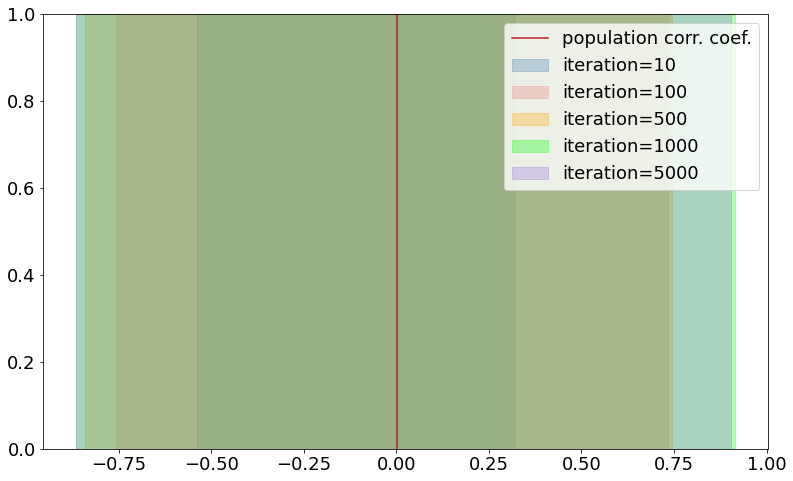

In [15]:
colors = ['steelblue', 'lightcoral', 'orange', 'lime', 'mediumpurple']

plt.figure(figsize=(13, 8))

plt.axvline(x=popu_coef, color='firebrick', label='population corr. coef.')

for idx, iteration in enumerate(iterations):
    
    interested_data = df_diff_iteration[df_diff_iteration['iteration']==iteration]

    plt.axvspan(xmin=interested_data['min_coef'].values[0], xmax=interested_data['max_coef'].values[0], 
                label=f'iteration={iteration}', alpha=0.3, color=colors[idx])

plt.legend()
plt.show()

### Observation

The computed correlation coefficients from sample (of same size) are not getting closer to population correlation coefficient when the iteration becomes higher.

### Conclusion

No matter how much of iteration we use, we couldn't get stable and reliable correlation coefficients from small samples.

In fact, there is greater likelihood of obtaining a spuriously-large correlation coefficient from smaller sample size.

## Study 4: Distribution of correlation coefficients using different samples (of same sample size).

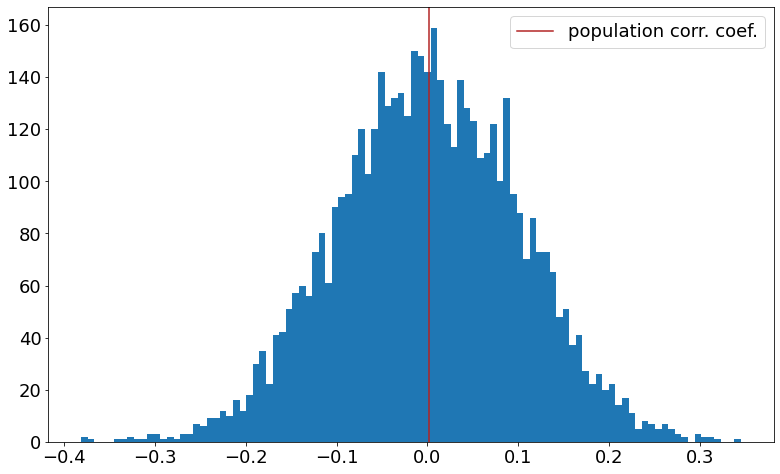

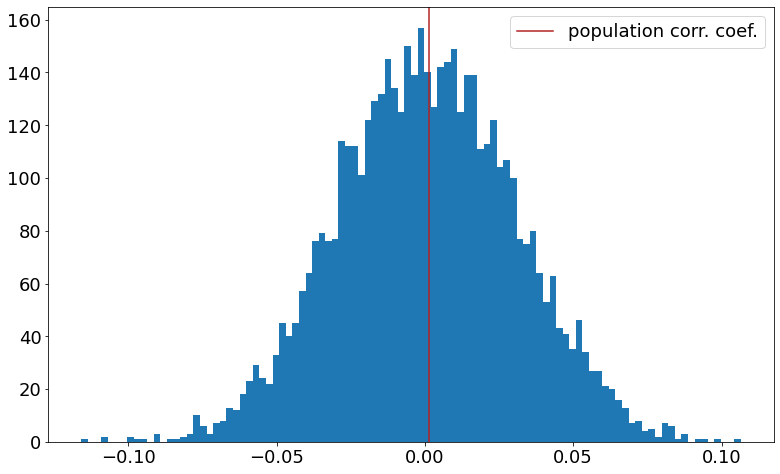

In [16]:
sample_sizes = [100, 1000]

for sample_size in sample_sizes:

    iteration = 5000

    iterations = []
    coefs = []

    for i in range(iteration):

        sample = df_data.sample(n=sample_size, replace=False)

        coef, p_value = spearmanr(a=sample['x'], b=sample['y'])

        iterations.append(i)
        coefs.append(coef)

    df_distribution = pd.DataFrame(list(zip(iterations, coefs)), 
                                     columns =['iteration', 'coef'])

    plt.figure(figsize=(13, 8))

    plt.axvline(x=popu_coef, color='firebrick', label='population corr. coef.')

    plt.hist(x=df_distribution['coef'], bins=100)

    plt.legend()

    plt.show()

### Observation

The larger the sample size, the lesser the probability of obtaining large correlation coefficient (i.e. strong correlation) when our population correlation coeffieint is close to 0.

### Conclusion

Large correlation coefficients are more likely to occur purely by chance if the sample size is small. However, if we have large sample size, the large correlation coefficients are less likely to occur merely by chance. In other words, the large correlation coefficients happen because it represents a genuine relationship between the two variables when the sample is large.

For example, a correlation of 0.20 is more likely to occur by chance with a sample size of 5, but is less likely to occur by chance with a sample size of 500.

## Study 5: the relationship between correlation coefficient and p-value (Sample)

Comparison between small sample and large sample.

In [17]:
sample_sizes = [10, 100, 1000]

for sample_size in sample_sizes:

    iteration = 500

    iterations = []
    coefs = []
    p_values = []

    for i in range(iteration):

        sample = df_data.sample(n=sample_size, replace=False)

        coef, p_value = spearmanr(a=sample['x'], b=sample['y'])

        iterations.append(i)
        coefs.append(coef)
        p_values.append(p_value)

    df_p_values = pd.DataFrame(list(zip(iterations, coefs, p_values)), 
                                     columns =['iteration', 'coef', 'p_value'])
    
    significant = df_p_values[df_p_values['p_value']<0.05]
    
    max_coef = significant['coef'].max()
    min_coef = significant['coef'].min()
    
    print(f'Sample size: {sample_size}')
    print(f'Among {len(significant)} times to be considered statistial significant:')
    print(f'   max corr. coef.: {max_coef}')
    print(f'   min corr. coef.: {min_coef}\n')

Sample size: 10
Among 25 times to be considered statistial significant:
   max corr. coef.: 0.8424242424242423
   min corr. coef.: -0.9151515151515152

Sample size: 100
Among 22 times to be considered statistial significant:
   max corr. coef.: 0.3095589558955895
   min corr. coef.: -0.37047704770477047

Sample size: 1000
Among 17 times to be considered statistial significant:
   max corr. coef.: 0.08295983895983897
   min corr. coef.: -0.07983257583257583



### Observation

When the correlation coefficient of population is close to 0, the smaller the sample size, the greater the likelihood of obtaining a spuriously-large correlation coefficient that is considered statistical significant. However, this large correlation coefficient may not reflect the actual correlation coefficient of population.

### Conclusion

With larger sample size, the correlation coeficient that is considered to be statistical significant is more reliable (i.e. closer to the correlation coefficient of population). 

---

## Reference

http://users.sussex.ac.uk/~grahamh/RM1web/Eight%20things%20you%20need%20to%20know%20about%20interpreting%20correlations.pdf